In [26]:
#imports
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import matplotlib
from matplotlib import pyplot as plt
# import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
cd ~

/Users/ak


In [3]:
cd downloads

/Users/ak/Downloads


In [4]:
import os
os.getcwd()

'/Users/ak/Downloads'

In [5]:
ls

388fd3a8-e4fa-42a1-a6dc-b9c2006d6f91.jpg
AkshithKandakatla_01_15_2019.pdf
AkshithKandakatla_11_15_2018.pdf
AkshithKandakatla_12_14_2018.pdf
Akshith_F1 Visa  Persona Questions_Happy Schools.docx
Akshith_NJIT I20.pdf
Akshith_research statement_v2 (1).pdf
Akshith_research statement_v2.pdf
EZPass logs.jpeg
EZPass transactions_CSV.jpeg
F1 Visa Coaching - Persona Questions.docx
GitHubDesktop.zip
NJD1182010.pdf
New passport first and last (1).pdf
Penske truck & gas Receipt (1).pdf
Penske truck & gas Receipt.pdf
SAMPLE_SUPERVISOR_LTR_Consulate_POE_for_STUDENTS.doc
TunnelBear.zip
WhatsApp Image 2018-09-18 at 17.33.10.jpeg
test.csv
train.csv
transcsv (1).csv
transcsv (2).csv
transcsv.csv


In [6]:
train_data = pd.read_csv("train.csv")

In [7]:
#shape of data
train_data.shape

(19579, 3)

In [8]:
#first 10
train_data.head(10)

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL
5,id22965,"A youth passed in solitude, my best years spen...",MWS
6,id09674,"The astronomer, perhaps, at this point, took r...",EAP
7,id13515,The surcingle hung in ribands from my body.,EAP
8,id19322,I knew that you could not say to yourself 'ste...,EAP
9,id00912,I confess that neither the structure of langua...,MWS


In [9]:
#getting the unique authors
train_data.author.unique()

array(['EAP', 'HPL', 'MWS'], dtype=object)

In [10]:
# extracting the number of examples of each class
EAP_len = train_data[train_data['author'] == 'EAP'].shape[0]
HPL_len = train_data[train_data['author'] == 'HPL'].shape[0]
MWS_len = train_data[train_data['author'] == 'MWS'].shape[0]

In [11]:
EAP_len
HPL_len
MWS_len

6044

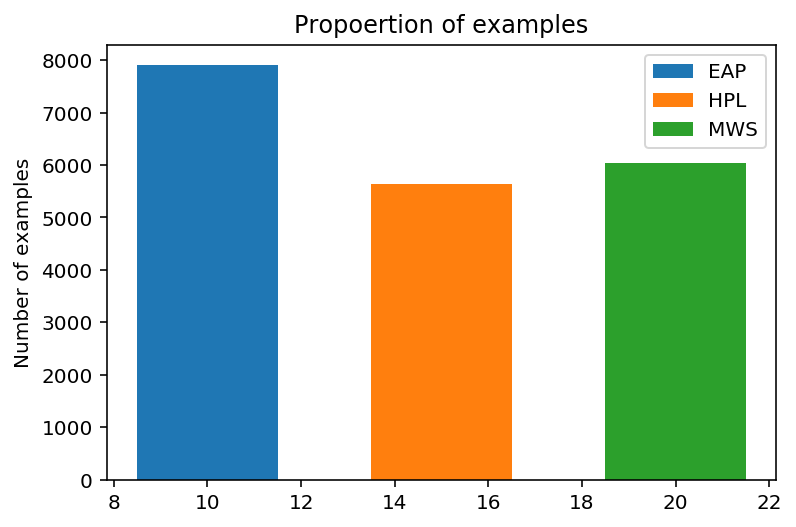

In [12]:
plt.bar(10,EAP_len,3, label="EAP")
plt.bar(15,HPL_len,3, label="HPL")
plt.bar(20,MWS_len,3, label="MWS")
plt.legend()
plt.ylabel('Number of examples')
plt.title('Propoertion of examples')
plt.show()

In [13]:
#Feature Engineering: removing punctuations
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [15]:
#applying punctuations function to the dataset
train_data['text'] = train_data['text'].apply(remove_punctuation)
train_data.head(10)

,id,text,author
0,id26305,This process however afforded me no means of a...,EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,In his left hand was a gold snuff box from whi...,EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,Finding nothing else not even gold the Superin...,HPL
5,id22965,A youth passed in solitude my best years spent...,MWS
6,id09674,The astronomer perhaps at this point took refu...,EAP
7,id13515,The surcingle hung in ribands from my body,EAP
8,id19322,I knew that you could not say to yourself ster...,EAP
9,id00912,I confess that neither the structure of langua...,MWS


In [29]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/ak/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [31]:
#Removing the stop words
#stop words: is, a, this, etc
# removing the stop words from the dataset

# extracting the stopwords from nltk library
sw = stopwords.words('english')
# displaying the stopwords
np.array(sw)

# os.getcwd()

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [24]:
#cd Documents/Projects/Machine-Learning/NLP

/Users/ak/Documents/Projects/Machine-Learning/NLP


In [32]:
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

In [33]:
train_data['text'] = train_data['text'].apply(stopwords)
train_data.head(10)

,id,text,author
0,id26305,process however afforded means ascertaining di...,EAP
1,id17569,never occurred fumbling might mere mistake,HPL
2,id11008,left hand gold snuff box capered hill cutting ...,EAP
3,id27763,lovely spring looked windsor terrace sixteen f...,MWS
4,id12958,finding nothing else even gold superintendent ...,HPL
5,id22965,youth passed solitude best years spent gentle ...,MWS
6,id09674,astronomer perhaps point took refuge suggestio...,EAP
7,id13515,surcingle hung ribands body,EAP
8,id19322,knew could say stereotomy without brought thin...,EAP
9,id00912,confess neither structure languages code gover...,MWS
